In [1]:
import numpy as np
!pip install "gymnasium[mujoco]"
!pip install mpi4py


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [71]:
import os
import subprocess
import numpy as np

In [3]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_everything

trajectory = download_everything('td3, TBP, td3_models, zs_td3')

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
TD3.py already exists.
Directory 'model' already exists and is not empty.
model/actor_cpu.pth already exists.
model/q1_cpu.pth already exists.
model/q2_cpu.pth already exists.
Zero_Sum_TD3.py already exists.


In [4]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

In [5]:
from Zero_Sum_TD3 import ZS_TD3
from TD3 import MLPActorCritic
from utils.logx import EpochLogger
from utils.logx import colorize
from utils.run_utils import setup_logger_kwargs
from TBP import ThreeBodyEnv
import torch

Directory 'utils' already exists.
trajectory.csv already exists.
Directory 'utils' already exists.


In [16]:
# Define variables directly
env = ThreeBodyEnv(trajectory*1.5)
hid = 32
l = 2
gamma = 0.99
seed = 0
epochs = 50
exp_name = 'TD3'
steps_per_epoch_=30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid]*l)
states_array = []
logger_kwargs = setup_logger_kwargs(exp_name, seed)


In [73]:
zs_td3 = ZS_TD3(lambda : ThreeBodyEnv(trajectory*np.array([1.1, 1.1, 1, 1]), error_range=0.01, final_range=0.001), MLPActorCritic, ac_kwargs,seed=seed, steps_per_epoch=steps_per_epoch_, epochs=epochs, logger_kwargs=logger_kwargs, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)


# ddpg = DDPG(lambda : ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), MLPActorCritic, ac_kwargs,seed_=seed, steps_per_epoch=steps_per_epoch_, epochs_=epochs, logger_kwargs_=logger_kwargs, device=device, batch_size=1024, start_steps=5000, update_after=1000, update_every=2000)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/TBP/TD3/ZeroSum/data/TD3/TD3_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "env_fn":	"<function <lambda> at 0x16b804540>",
    "epochs":	50,
    "exp_name":	"TD3",
    "first_player_start_learning_epoch":	20,
    "gamma":	0.99,
    "logger_kwargs":	{
        "exp_name":	"TD3",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/TBP/TD3/ZeroSum/data/TD3/TD3_s0"
    },
    "max_ep_len":	30000,
    "noise_clip":	0.5,
    "num_test_episodes":	10,
    "pi_lr":	0.001,
    "policy_delay":	2,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed":	0,
    "self":	{
        "<Zero_Sum_TD3.ZS_TD3 object at 0x16b77afd0>":	{
            "ac_kwargs":	{
                "hidden_sizes":	[
   

In [74]:
# td3.save()
zs_td3.load()
# td3.epochs = 10

Model loaded successfully and device is cpu! 🥰😎


[0.01012109 0.00060113 0.14418236 0.35926629]
idx 0.0 state 0.3872513640255955
too much error 🥲😱
second player was in the game
Data saved to results folder 😜


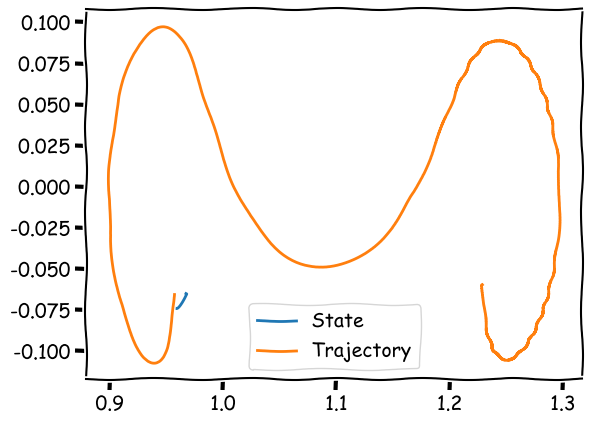

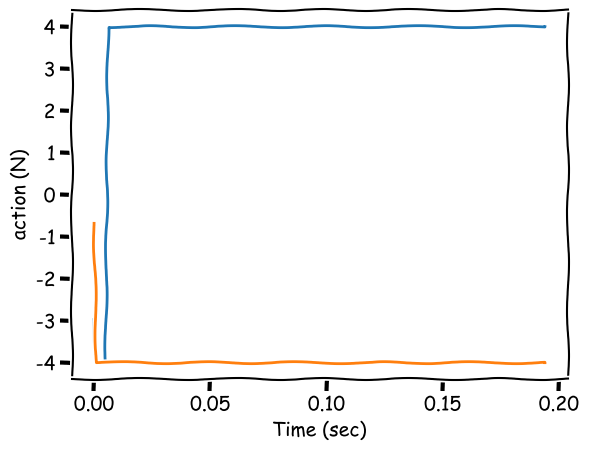

In [75]:
zs_td3.test(fun_mode=True)

In [47]:
zs_td3.load()
zs_td3.load_1()

Model loaded successfully and device is cpu! 🥰😎
Second player model loaded successfully and device is cpu! 🥰😎


done 🥺
second player was in the game
Data saved to results folder 😜


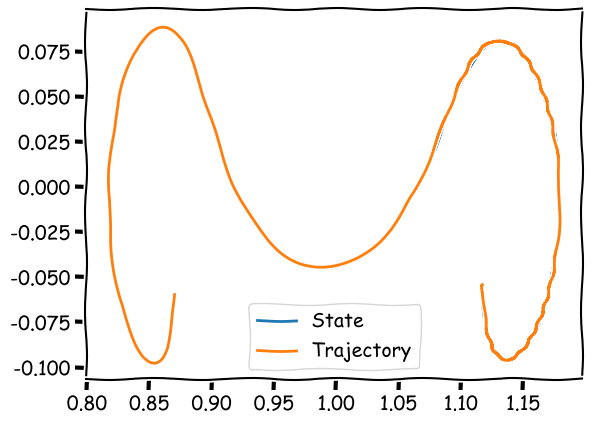

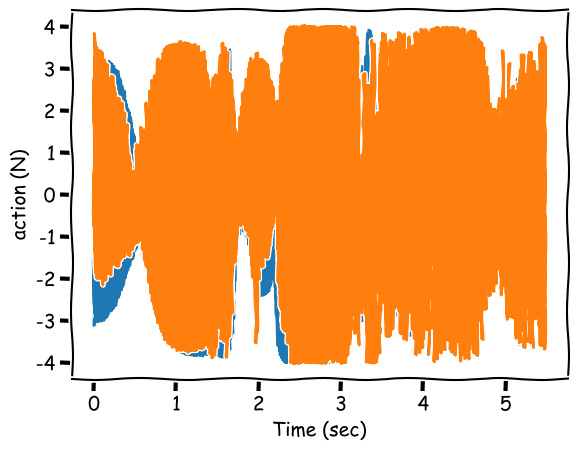

In [48]:
zs_td3.test(fun_mode=True, save_data=True)

In [49]:
# zs_td3.first_player_start_learning_epoch = 0
# zs_td3.epochs = 40
# zs_td3.train()

In [50]:
# zs_td3.save()
# zs_td3.save_1()

In [51]:
try:
    # noinspection PyUnresolvedReferences
    import google.colab
    # download created models
    if os.path.isfile("td3_TBP_results.tar.gz"):
        os.remove("td3_TBP_results.tar.gz")
    !tar cvfz td3_TBP_results.tar.gz model/
    # noinspection PyUnresolvedReferences
    from google.colab import files
    files.download('td3_TBP_results.tar.gz')
    print(colorize("Done! 🥰😎", 'blue', bold=True))
except Exception as e:
    print(e, end=' ----> ')
    print(colorize("Something Wrong 🧐😩, or maybe you used your Mac 😱🥲", 'red', bold=True))

No module named 'google.colab' ----> Something Wrong 🧐😩, or maybe you used your Mac 😱🥲


In [52]:
import torch
from copy import deepcopy


# Create inference-only model and set to eval mode
model_copy = deepcopy(zs_td3.ac.pi)
inference_model = model_copy.to(device)
inference_model.eval()

# Prepare sample input without requiring gradients
sample_input = torch.zeros(1, zs_td3.env.observation_space.shape[0], device=device)

# Trace the model with the sample input
with torch.no_grad():
    traced_model = torch.jit.trace(inference_model, sample_input)

# Save the traced model
if os.path.isdir('Cpp_models'):
    traced_model.save('Cpp_models/zs_td3_traced_deterministic.pt')
else:
    os.makedirs('Cpp_models')
    traced_model.save('Cpp_models/zs_td3_traced_deterministic.pt')
traced_model.save('../../../../C/model/zs_td3_traced_deterministic.pt')
print('Deterministic model saved for C++ inference.')

Deterministic model saved for C++ inference.
